In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [ ]:
youtube_video = "https://www.youtube.com/watch?v=A4OmtyaBHFE"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'A4OmtyaBHFE'

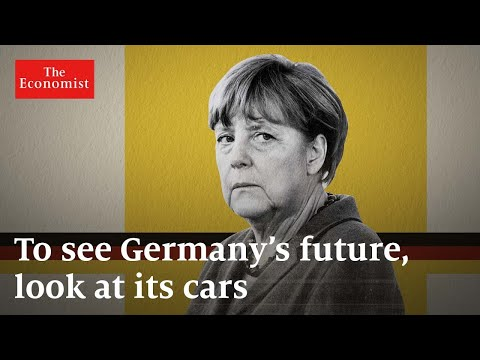

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [ ]:
transcript[0:5]

[{'text': "for Germany it's the end of an era and",
  'start': 1.439,
  'duration': 5.46},
 {'text': "as Europe's biggest economy there are",
  'start': 4.859,
  'duration': 4.801},
 {'text': 'some huge challenges ahead', 'start': 6.899, 'duration': 4.32},
 {'text': 'from its increasingly complex', 'start': 9.66, 'duration': 3.84},
 {'text': 'relationship with China to climate',
  'start': 11.219,
  'duration': 4.98}]

In [ ]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9003


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 for Germany it's the end of an era and as Europe's biggest economy there are some huge challenges ahead from its increasingly complex relationship with China to climate change all eyes will be on how Germany's new leaders grapple with these issues but there's one German industry that reveals a lot about the country's prospects it's cars traditionally the car industry here has been very powerful there have been open doors to German Ministries to the Chancery Germany's car industry is a vital part of its economy with links to government that go back decades how this world renowned motor industry navigates the challenges ahead could tell you more than you think about Germany's future [Music] the curves the Precision it's Cutting Edge engineering like this that has helped Place car makers at the heart of the German economy and the industry has proved of Bellwether for the country's future prospects too since the 70s car exports have risen with Germany's wealth and influence ma

Your max_length is set to 142, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Summarized text
 economist's assessment of Germany's future after Angela Merkel . Germany risks losing competitiveness throughout its economy . Germany has to do better right we have those very big companies this very big players here but they aren't the disruptor the driver behind in Innovation disruption comes always for me new Young companies which Drive change .
input text 
ibe
Summarized text
 ibe ibe. ibe . ibe is the world's first female president . She was elected to the U.S. Senate in 2008 . ibi is the first woman to hold a Senate seat in Congress to represent the nation's first black president . The U.N. Senate is the second chamber in the world to hold the chamber chamber .


In [ ]:
len(str(summarized_text))

3240

In [ ]:
str(summarized_text)

'[" Germany\'s car industry is a vital part of its economy with links to government that go back decades . The industry has proved of Bellwether for the country\'s future prospects too since the 70s car exports have risen with Germany\'s wealth and influence manufacturing manufacturing since the 1970s .", " In 2000 seven of the world\'s most valuable companies were German but in the past two decades that number has fallen to just three . Almost half of Germany\'s GDP comes from exports cars make up the biggest proportion of this who Germany Sells Cars to matters it can point to alliances or trouble brewing .", " In 1998 German trade with China was worth 16 billion dollars dollars now it\'s worth over 180 billion . There\'s a fear that Germany could have become too reliant on the Chinese market for the past 16 years . Angela Merkel has courted China in the name of trade but there\'s a worry of putting all of your eggs in the Chinese basket might leave you exposed to some of the ill Wind